In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Import data
df = pd.read_csv('../generate_test_data/answers.csv')
df

,Ac02,Ac03,Ac06,Ac10,Ac13,Ec01,Ec03,Ec05,Fa02,Fa03,...,Mo10,Mo11,Sa01,Sa02,Sa03,Sa04,So01,So04,So07,So08
0,1,5,1,1,1,5,5,1,3,2,...,3,4,5,3,4,4,1,3,3,3
1,1,4,4,4,5,2,2,1,2,4,...,5,1,3,2,3,1,4,3,5,5
2,1,4,2,1,2,2,1,4,4,4,...,3,3,3,3,3,1,1,4,5,4
3,1,3,1,5,2,4,5,5,2,5,...,4,3,1,1,5,1,2,3,3,2
4,4,3,2,1,1,2,5,3,4,1,...,2,4,1,5,1,1,2,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,2,2,4,2,4,4,4,4,4,...,2,2,4,4,4,3,4,4,2,4
196,4,3,3,3,3,3,3,4,3,3,...,3,3,4,4,1,3,2,4,2,4
197,4,3,2,4,4,2,4,5,3,3,...,3,3,3,4,3,3,4,4,3,3
198,4,4,4,4,4,4,5,5,1,5,...,1,1,4,4,4,3,4,4,3,5


In [22]:
# Generate a probability column based on In02, In03, In04, In05
y = (df['In02'] + df['In03'] + df['In04'] + df['In05'])/20

<AxesSubplot:ylabel='Frequency'>

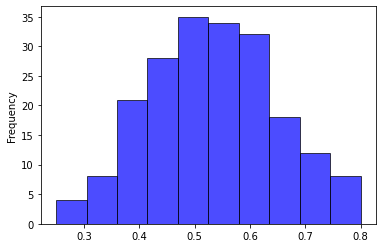

In [23]:
# Histogram of the probability of desertion based on In responses
y.plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black')

In [24]:
# Split Data
headers = ['Ac02','Ac03','Ac06','Ac10','Ac13','Ec01','Ec03','Ec05','Fa02','Fa03','Fa07','Fa08','Fa09','Mo02','Mo08','Mo09','Mo10','Mo11','Sa01','Sa02','Sa03','Sa04','So01','So04','So07','So08']
X = df[headers]
X.head()

,Ac02,Ac03,Ac06,Ac10,Ac13,Ec01,Ec03,Ec05,Fa02,Fa03,...,Mo10,Mo11,Sa01,Sa02,Sa03,Sa04,So01,So04,So07,So08
0,1,5,1,1,1,5,5,1,3,2,...,3,4,5,3,4,4,1,3,3,3
1,1,4,4,4,5,2,2,1,2,4,...,5,1,3,2,3,1,4,3,5,5
2,1,4,2,1,2,2,1,4,4,4,...,3,3,3,3,3,1,1,4,5,4
3,1,3,1,5,2,4,5,5,2,5,...,4,3,1,1,5,1,2,3,3,2
4,4,3,2,1,1,2,5,3,4,1,...,2,4,1,5,1,1,2,5,2,5


## Regresion Lineal

In [25]:
# Split Data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.00
R-squared: 0.89


In [28]:
import statsmodels.api as sm

# Add a constant term for the intercept
X_train_sm = sm.add_constant(X_train)

# Train the model using statsmodels
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Display the summary
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     22.41
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.04e-36
Time:                        05:56:22   Log-Likelihood:                 265.40
No. Observations:                 160   AIC:                            -476.8
Df Residuals:                     133   BIC:                            -393.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3894      0.051      7.642      0.0

## Regression Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [33]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_reg,
out_file='desertion_regression.dot',
feature_names=headers,
rounded=True,
filled=True
)

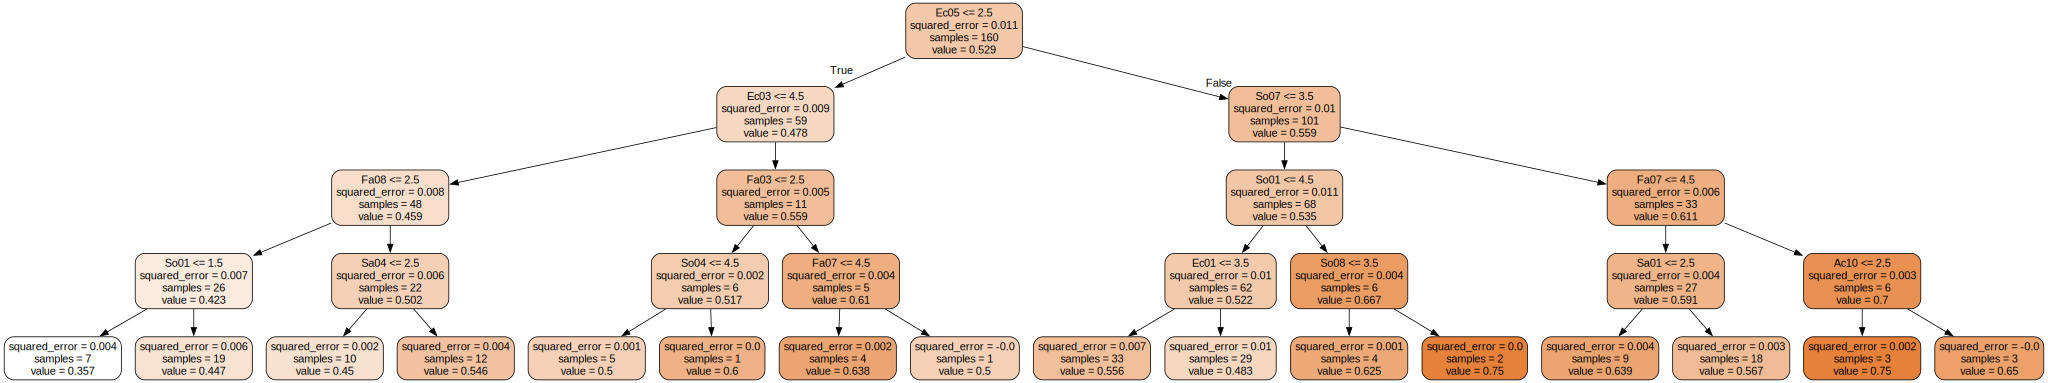

In [34]:
from graphviz import Source
Source.from_file('desertion_regression.dot')

In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = tree_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Error cuadratico medio (MSE): {mse:.2f}")
print(f"Raiz del error Cuadratico Medio (RMSE): {rmse:.2f}")

Error cuadratico medio (MSE): 0.01
Raiz del error Cuadratico Medio (RMSE): 0.12


In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Error Medio Absoluto (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.09


In [42]:
y_train_pred = tree_reg.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {rmse_train:.2f}")

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Testing RMSE: {rmse_test:.2f}")

Training RMSE: 0.07
Testing RMSE: 0.12


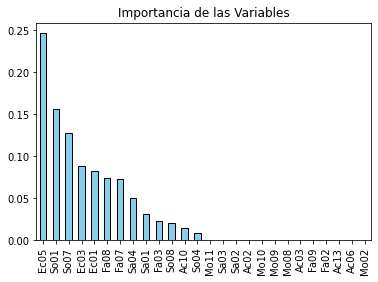

In [41]:
importances = tree_reg.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Importancia de las Variables')
plt.show()